Processed 14 December 2021. Data are [here](https://www.covid19.admin.ch/en/vaccination/symptoms).  Documentation is [here](https://www.covid19.admin.ch/api/data/documentation). Code is [here](https://github.com/jean-luc-jucker/side_effects_202112).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Adverse reactions
---

In [2]:
raw = pd.read_csv(os.path.join('bag_covid_19_data_csv_14_December_2021/data', 'COVID19VaccSymptoms.csv'))
raw.date = pd.to_datetime(raw.date, infer_datetime_format=True)
data = raw.drop(columns={'geoRegion', 'type', 'version'})
print(data.info())
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4987 entries, 0 to 4986
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       4987 non-null   datetime64[ns]
 1   vaccine    4987 non-null   object        
 2   severity   4987 non-null   object        
 3   age_group  4987 non-null   object        
 4   sumTotal   4987 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 194.9+ KB
None


,date,vaccine,severity,age_group,sumTotal
0,2021-03-23,all,all,all,862
1,2021-03-24,all,all,all,862
2,2021-03-25,all,all,all,862
3,2021-03-26,all,all,all,862
4,2021-03-27,all,all,all,862
...,...,...,...,...,...
4982,2021-11-19,all,all,unknown,1203
4983,2021-11-20,all,all,unknown,1203
4984,2021-11-21,all,all,unknown,1203
4985,2021-11-22,all,all,unknown,1203


In [3]:
print('Number of days :::::')
print(data.date.nunique())

print('\nVaccine :::::')
print(data.vaccine.value_counts(dropna=False))

print('\nSeverity :::::')
print(data.severity.value_counts(dropna=False))

print('\nAge groups :::::')
print(data.age_group.value_counts(dropna=False))

print('\nTotals number :::::')
print(data.sumTotal.nunique())

Number of days :::::
246

Vaccine :::::
all                2710
moderna             738
pfizer_biontech     738
unknown             738
johnson_johnson      63
Name: vaccine, dtype: int64

Severity :::::
all            2977
not_serious    1005
serious        1005
Name: severity, dtype: int64

Age groups :::::
all        3015
0 - 1       250
65 - 74     246
2 - 11      246
18 - 44     246
12 - 17     246
45 - 64     246
75+         246
unknown     246
Name: age_group, dtype: int64

Totals number :::::
251


In [4]:
# Print total
data.sumTotal.max()

10382

## By vaccine

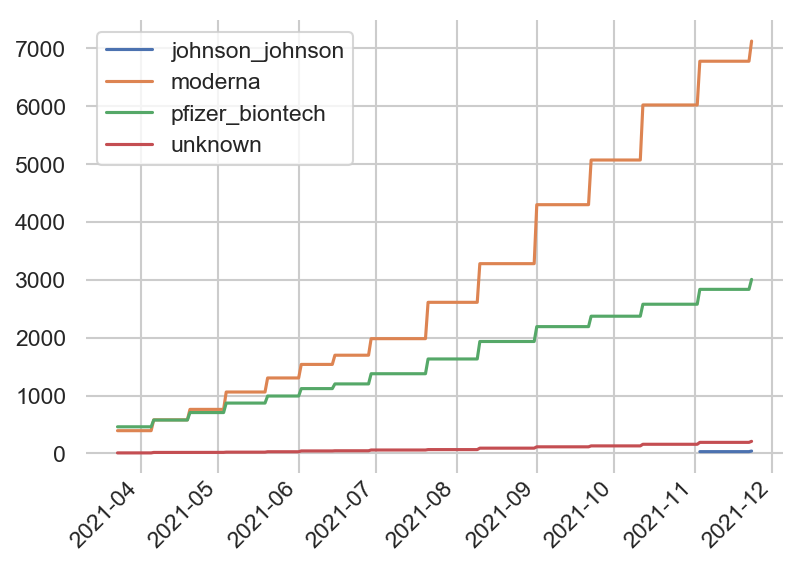

In [5]:
import numpy as np

sns.set(rc={"figure.dpi":150}, style='whitegrid')
plot1 = data.loc[(data['age_group']=='all') &
                (data['severity']=='all') &
                (data['vaccine']!='all')]
g=sns.lineplot(data=plot1, x='date', y='sumTotal', hue='vaccine')
plt.xticks(rotation=45, ha='right', va='baseline')
plt.xlabel('')
plt.ylabel('')
plt.legend(title=None)
sns.despine(left=True, bottom=True)


plt.show()

In [6]:
# Export for datawrapper
#dw1 = plot1[['date', 'vaccine', 'sumTotal']]
#dw1.pivot(index='date', columns='vaccine').to_csv('datawrapper/dw1.csv', index_label='date')

## By age group

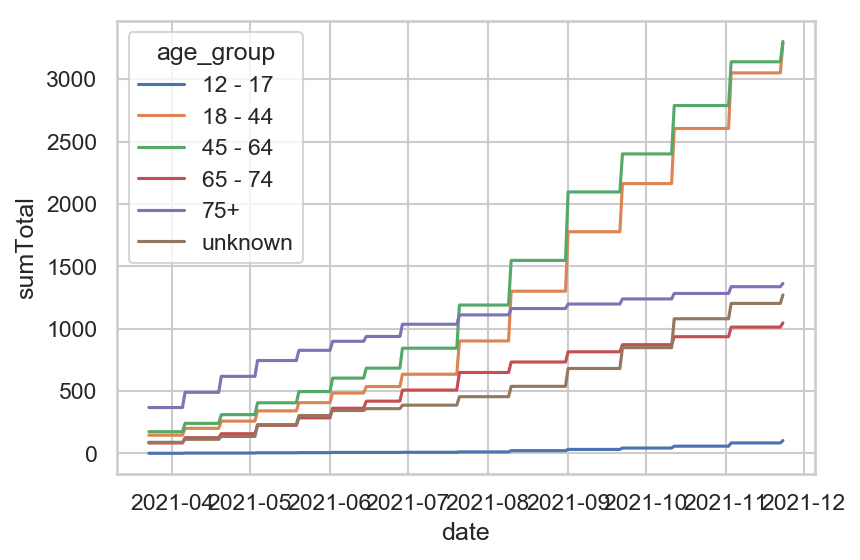

In [7]:
plot2 = data.loc[(data['vaccine']=='all') &
                (data['severity']=='all') &
                (data['age_group']!='all') &
                (data['age_group']!='0 - 1') &
                (data['age_group']!='2 - 11') 
                ]
g=sns.lineplot(data=plot2, x='date', y='sumTotal', hue='age_group')
plt.show()

In [8]:
# Export for datawrapper
plot2 = data.loc[(data['vaccine']=='all') &
                (data['severity']=='all') &
                (data['age_group']!='all') &
                (data['age_group']!='unknown') &
                (data['age_group']!='0 - 1') &
                 (data['age_group']!='2 - 11') 
                ]

dw2 = plot2[['date', 'age_group', 'sumTotal']] 
dw2.pivot(index='date', columns='age_group').to_csv('datawrapper/dw2.csv', index_label='date')

# By severity

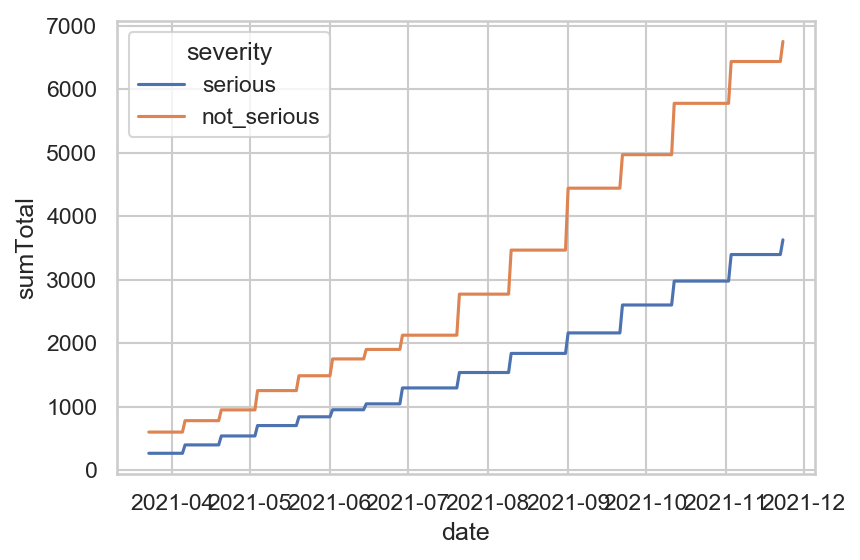

In [9]:
plot3 = data.loc[(data['vaccine']=='all') &
                (data['severity']!='all') #&
                #(data['age_group']=='all')
                ]
g=sns.lineplot(data=plot3, x='date', y='sumTotal', hue='severity')
plt.show()

In [10]:
# Export for datawrapper
#dw3 = plot3[['date', 'severity', 'sumTotal']] 
#dw3.pivot(index='date', columns='severity').to_csv('datawrapper/dw3.csv', index_label='date')

# Doses administered
---

In [11]:
raw = pd.read_csv(os.path.join('bag_covid_19_data_csv_14_December_2021/data', 'COVID19AdministeredDoses_vaccine.csv'))
raw.date = pd.to_datetime(raw.date, infer_datetime_format=True)
data2 = raw.loc[(raw['geoRegion']=='CHFL') &
               (raw['date']>'2021-03-22') &
               (raw['date']<'2021-11-24'),
               ('date', 'vaccine', 'sumTotal')
              ]
print(data2.info())
data2

<class 'pandas.core.frame.DataFrame'>
Int64Index: 738 entries, 7610 to 8571
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      738 non-null    datetime64[ns]
 1   vaccine   738 non-null    object        
 2   sumTotal  738 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 23.1+ KB
None


,date,vaccine,sumTotal
7610,2021-03-23,johnson_johnson,2
7611,2021-03-24,johnson_johnson,2
7612,2021-03-25,johnson_johnson,2
7613,2021-03-26,johnson_johnson,2
7614,2021-03-27,johnson_johnson,2
...,...,...,...
8567,2021-11-19,pfizer_biontech,4012634
8568,2021-11-20,pfizer_biontech,4021874
8569,2021-11-21,pfizer_biontech,4024484
8570,2021-11-22,pfizer_biontech,4044954


In [12]:
# Total number of doses administered between 23 March 2021 and 23 November 2021
data2.groupby('vaccine').max()['sumTotal'].sum() # i.e., 11,684,834, slightly different than here: https://www.covid19.admin.ch/en/vaccination/symptoms (11,697,437)

11684834

# Vaccinated people
---

In [13]:
raw = pd.read_csv(os.path.join('bag_covid_19_data_csv_14_December_2021/data', 'COVID19VaccPersons_vaccine.csv'))
raw.date = pd.to_datetime(raw.date, infer_datetime_format=True)
data3 = raw.loc[(raw['geoRegion']=='CHFL') &
               (raw['date']>'2021-03-22') &
               (raw['date']<'2021-11-24') &
               (raw['type']=='COVID19FullyVaccPersons'),
               ('date', 'vaccine', 'sumTotal')
              ]
print(data3.info())
data3

<class 'pandas.core.frame.DataFrame'>
Int64Index: 738 entries, 35077 to 38178
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      738 non-null    datetime64[ns]
 1   vaccine   738 non-null    object        
 2   sumTotal  738 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 23.1+ KB
None


,date,vaccine,sumTotal
35077,2021-03-23,johnson_johnson,1
35078,2021-03-24,johnson_johnson,1
35079,2021-03-25,johnson_johnson,1
35080,2021-03-26,johnson_johnson,1
35081,2021-03-27,johnson_johnson,1
...,...,...,...
38174,2021-11-19,pfizer_biontech,1942136
38175,2021-11-20,pfizer_biontech,1943557
38176,2021-11-21,pfizer_biontech,1943729
38177,2021-11-22,pfizer_biontech,1945277


In [14]:
raw.vaccine.value_counts()

moderna            45696
pfizer_biontech    45696
johnson_johnson    45696
Name: vaccine, dtype: int64

In [15]:
# Total number of people vaccinated between 23 March 2021 and 23 November 2021
data3.groupby('vaccine').max()['sumTotal'].sum() # i.e., 5,708,607, slightly different than here: https://www.covid19.admin.ch/en/vaccination/persons?geoView=table (5,790,578)

5708607

# Merge adverse reactions and doses administered
---

In [16]:
print(data.shape)
print(data2.shape)
print(data.info())
print(data2.info())

(4987, 5)
(738, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4987 entries, 0 to 4986
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       4987 non-null   datetime64[ns]
 1   vaccine    4987 non-null   object        
 2   severity   4987 non-null   object        
 3   age_group  4987 non-null   object        
 4   sumTotal   4987 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 194.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 738 entries, 7610 to 8571
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      738 non-null    datetime64[ns]
 1   vaccine   738 non-null    object        
 2   sumTotal  738 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 23.1+ KB
None


Object 'data' is longer, since it includes more grouping vars. Let's keep only those we are interested in:

In [17]:
data_slimmed = data.loc[(data['severity']=='all') & # keep only all severities
                        (data['age_group']=='all') & # keep only all age groups
                        (data['vaccine']!='unknown') & # remove unknown vaccines as well, since data2 does not have them
                        (data['vaccine']!='all'), 
                       ('date', 'vaccine', 'sumTotal')]

Let's reprint shapes:

In [18]:
print(data_slimmed.shape)
print(data2.shape)
print(data_slimmed.info())
print(data2.info())

(513, 3)
(738, 3)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 513 entries, 246 to 758
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      513 non-null    datetime64[ns]
 1   vaccine   513 non-null    object        
 2   sumTotal  513 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 16.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 738 entries, 7610 to 8571
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      738 non-null    datetime64[ns]
 1   vaccine   738 non-null    object        
 2   sumTotal  738 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 23.1+ KB
None


We see that df with side effects is shorter (513 lines instead of 738 in administered doses df). That's because Janssen vaccine was introduced much later than the two other vaccines. We can see that here:

In [19]:
print(data_slimmed.vaccine.value_counts())
print(data2.vaccine.value_counts())

pfizer_biontech    246
moderna            246
johnson_johnson     21
Name: vaccine, dtype: int64
pfizer_biontech    246
johnson_johnson    246
moderna            246
Name: vaccine, dtype: int64


In [20]:
merged = data2.merge(data_slimmed, on=('date', 'vaccine'), how='outer').rename(columns={'sumTotal_x': 'doses', 'sumTotal_y': 'reports'})
print(merged.shape)
print(merged.info())
merged

(738, 4)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 738 entries, 0 to 737
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     738 non-null    datetime64[ns]
 1   vaccine  738 non-null    object        
 2   doses    738 non-null    int64         
 3   reports  513 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 28.8+ KB
None


,date,vaccine,doses,reports
0,2021-03-23,johnson_johnson,2,NaN
1,2021-03-24,johnson_johnson,2,NaN
2,2021-03-25,johnson_johnson,2,NaN
3,2021-03-26,johnson_johnson,2,NaN
4,2021-03-27,johnson_johnson,2,NaN
...,...,...,...,...
733,2021-11-19,pfizer_biontech,4012634,2835.0
734,2021-11-20,pfizer_biontech,4021874,2835.0
735,2021-11-21,pfizer_biontech,4024484,2835.0
736,2021-11-22,pfizer_biontech,4044954,2835.0


In [21]:
# Check sums are same
print(merged.groupby('vaccine').max()['doses'].sum())
print(merged.groupby('vaccine').max()['reports'].sum())

11684834
10173.0


All good!

## Add rate per 100,000 administered doses

In [22]:
merged['rate'] = merged.reports/merged.doses*100000
merged

,date,vaccine,doses,reports,rate
0,2021-03-23,johnson_johnson,2,NaN,NaN
1,2021-03-24,johnson_johnson,2,NaN,NaN
2,2021-03-25,johnson_johnson,2,NaN,NaN
3,2021-03-26,johnson_johnson,2,NaN,NaN
4,2021-03-27,johnson_johnson,2,NaN,NaN
...,...,...,...,...,...
733,2021-11-19,pfizer_biontech,4012634,2835.0,70.651846
734,2021-11-20,pfizer_biontech,4021874,2835.0,70.489528
735,2021-11-21,pfizer_biontech,4024484,2835.0,70.443813
736,2021-11-22,pfizer_biontech,4044954,2835.0,70.087324


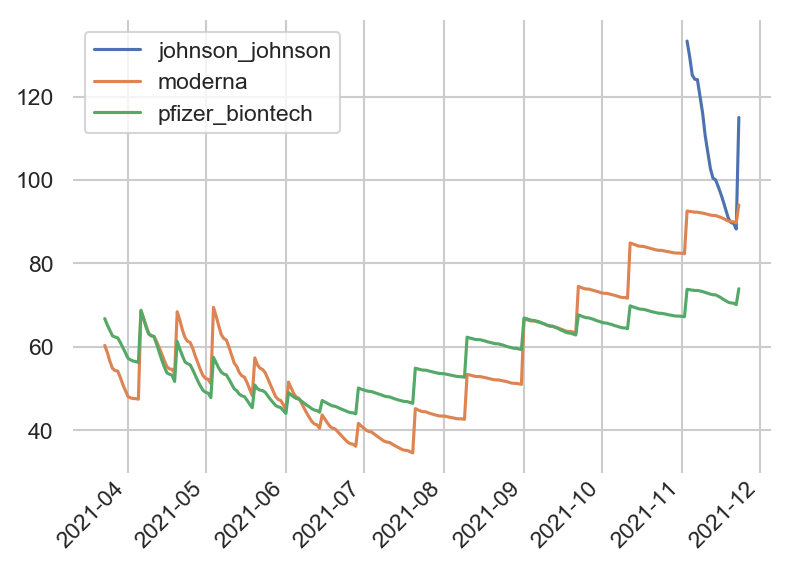

In [23]:
import numpy as np

sns.set(rc={"figure.dpi":150}, style='whitegrid')
#plot1 = data.loc[(data['age_group']=='all') &
#                (data['severity']=='all') &
#                (data['vaccine']!='all')]
g=sns.lineplot(data=merged, x='date', y='rate', hue='vaccine')
plt.xticks(rotation=45, ha='right', va='baseline')
plt.xlabel('')
plt.ylabel('')
plt.legend(title=None)
sns.despine(left=True, bottom=True)


plt.show()

In [24]:
# Export for datawrapper
#dw4 = merged[['date', 'vaccine', 'rate']]
#dw4.pivot(index='date', columns='vaccine').to_csv('datawrapper/dw4.csv', index_label='date')

# Merge adverse reactions and persons vaccinated
---

In [25]:
print(data.shape)
print(data3.shape)
print(data.info())
print(data3.info())

(4987, 5)
(738, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4987 entries, 0 to 4986
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       4987 non-null   datetime64[ns]
 1   vaccine    4987 non-null   object        
 2   severity   4987 non-null   object        
 3   age_group  4987 non-null   object        
 4   sumTotal   4987 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 194.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 738 entries, 35077 to 38178
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      738 non-null    datetime64[ns]
 1   vaccine   738 non-null    object        
 2   sumTotal  738 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 23.1+ KB
None


Object 'data' is longer, since it includes more grouping vars. Let's keep only those we are interested in:

In [26]:
data_slimmed = data.loc[(data['severity']=='all') & # keep only all severities
                        (data['age_group']=='all') & # keep only all age groups
                        (data['vaccine']!='unknown') & # remove unknown vaccines as well, since data2 does not have them
                        (data['vaccine']!='all'), 
                       ('date', 'vaccine', 'sumTotal')]

Let's reprint shapes:

In [27]:
print(data_slimmed.shape)
print(data3.shape)
print(data_slimmed.info())
print(data3.info())

(513, 3)
(738, 3)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 513 entries, 246 to 758
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      513 non-null    datetime64[ns]
 1   vaccine   513 non-null    object        
 2   sumTotal  513 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 16.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 738 entries, 35077 to 38178
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      738 non-null    datetime64[ns]
 1   vaccine   738 non-null    object        
 2   sumTotal  738 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 23.1+ KB
None


We see that df with side effects is shorter (513 lines instead of 738 in vaccinated people df). That's because Janssen vaccine was introduced much later than the two other vaccines. We can see that here:

In [28]:
print(data_slimmed.vaccine.value_counts())
print(data3.vaccine.value_counts())

pfizer_biontech    246
moderna            246
johnson_johnson     21
Name: vaccine, dtype: int64
pfizer_biontech    246
johnson_johnson    246
moderna            246
Name: vaccine, dtype: int64


In [29]:
merged = data3.merge(data_slimmed, on=('date', 'vaccine'), how='outer').rename(columns={'sumTotal_x': 'persons', 'sumTotal_y': 'reports'})
print(merged.shape)
print(merged.info())
merged

(738, 4)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 738 entries, 0 to 737
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     738 non-null    datetime64[ns]
 1   vaccine  738 non-null    object        
 2   persons  738 non-null    int64         
 3   reports  513 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 28.8+ KB
None


,date,vaccine,persons,reports
0,2021-03-23,johnson_johnson,1,NaN
1,2021-03-24,johnson_johnson,1,NaN
2,2021-03-25,johnson_johnson,1,NaN
3,2021-03-26,johnson_johnson,1,NaN
4,2021-03-27,johnson_johnson,1,NaN
...,...,...,...,...
733,2021-11-19,pfizer_biontech,1942136,2835.0
734,2021-11-20,pfizer_biontech,1943557,2835.0
735,2021-11-21,pfizer_biontech,1943729,2835.0
736,2021-11-22,pfizer_biontech,1945277,2835.0


In [30]:
# Check sums are same
print(merged.groupby('vaccine').max()['persons'].sum())
print(merged.groupby('vaccine').max()['reports'].sum())

5708607
10173.0


All good!

## Add rate per 100,000 vaccinated

In [31]:
merged['rate'] = merged.reports/merged.persons*100000
merged

,date,vaccine,persons,reports,rate
0,2021-03-23,johnson_johnson,1,NaN,NaN
1,2021-03-24,johnson_johnson,1,NaN,NaN
2,2021-03-25,johnson_johnson,1,NaN,NaN
3,2021-03-26,johnson_johnson,1,NaN,NaN
4,2021-03-27,johnson_johnson,1,NaN,NaN
...,...,...,...,...,...
733,2021-11-19,pfizer_biontech,1942136,2835.0,145.973300
734,2021-11-20,pfizer_biontech,1943557,2835.0,145.866574
735,2021-11-21,pfizer_biontech,1943729,2835.0,145.853666
736,2021-11-22,pfizer_biontech,1945277,2835.0,145.737599


In [37]:
merged.reports.value_counts()

1983.0    22
1934.0    22
2578.0    22
3279.0    22
1377.0    22
6021.0    22
2191.0    21
4298.0    21
5070.0    20
1632.0    20
6777.0    20
2835.0    20
31.0      20
2371.0    20
2611.0    20
870.0     16
1061.0    16
580.0     14
1201.0    14
460.0     14
761.0     14
393.0     14
1697.0    14
706.0     14
577.0     14
1538.0    13
1120.0    13
992.0     13
1304.0    13
3007.0     1
7125.0     1
41.0       1
Name: reports, dtype: int64

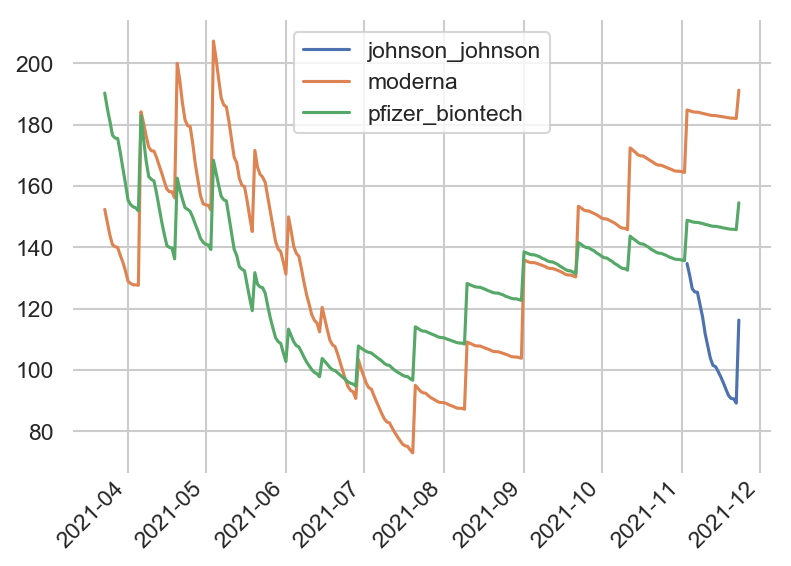

In [32]:
import numpy as np

sns.set(rc={"figure.dpi":150}, style='whitegrid')
#plot1 = data.loc[(data['age_group']=='all') &
#                (data['severity']=='all') &
#                (data['vaccine']!='all')]
g=sns.lineplot(data=merged, x='date', y='rate', hue='vaccine')
plt.xticks(rotation=45, ha='right', va='baseline')
plt.xlabel('')
plt.ylabel('')
plt.legend(title=None)
sns.despine(left=True, bottom=True)


plt.show()

In [33]:
# Export for datawrapper
dw5 = merged[['date', 'vaccine', 'rate']]
dw5.pivot(index='date', columns='vaccine').to_csv('datawrapper/dw5.csv', index_label='date')

### Compute overall rate (whole periods, all vaccines)

In [34]:
yes= 10382 / 5708607 * 100000
yes

181.86573361942763

In [35]:
no= (5708607-10382)/5708607 * 100000
no

99818.13426638057

In [36]:
yes+no

100000.0

In [37]:
# We'll use 182 and 99,818

*Please note: There are several ways to analyse and present the above data, and this is only one of them. Wise conclusions are drawn from a range of analyses, not on any single chart or piece of information. In all transparency, my sources are cited and the full code and data are available on my github account, and can be replicated and/or challenged. All potential errors are mine. Thank you*

# Text

Half-baked analyses I ran on reports of suspected adverse reactions to COVID-19 vaccines in Switzerland. Based on data by @Swissmedic_ and @BAG_OFSP_UFSP. Data and analyses have important limitations. Please interpret with caution and read notes and references.

Code and data are here: https://github.com/jean-luc-jucker/side_effects_202112. Feel free to edit, correct, improve, etc.